In [1]:
# In this EDA,we are working on Data Analyst profession situated in the United State. So, we need to three tasks
# 1. Find the Top 10 companies in terms of number of job offerings that are offering the job.
# 2. Find the Top 10 locations in terms of number of job offerings where the job is situated.
# 3. Find out the nature of the job.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
# 1. Find the Top 10 companies in terms of number of job offerings that are offering the job.

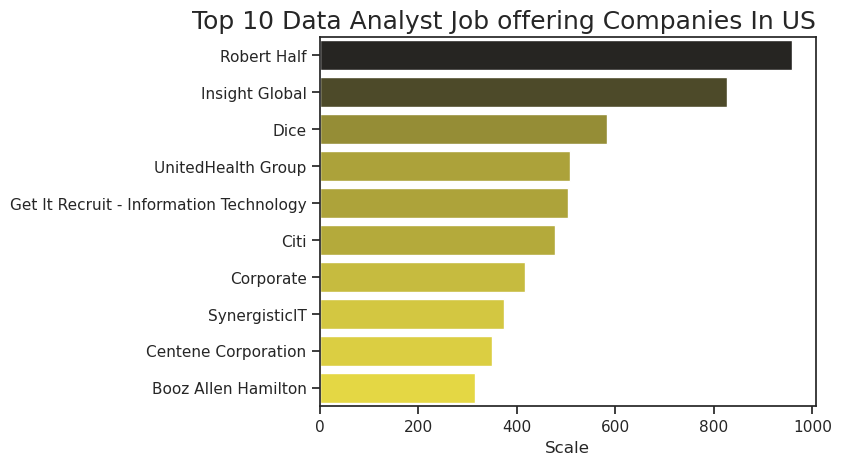

In [29]:
df1 = df.copy()

df1 = df1[(df1["job_country"] == "United States") & (df1["job_title_short"] == "Data Analyst")]
df1.dropna(subset = "company_name", inplace = True)

df1_plot = (df1.groupby(by = "company_name")
            .agg(job_offer = ("company_name", "size"))
            .sort_values(by = "job_offer", ascending = False)
            .head(10)
            )

sns.set_theme(style = "ticks")
sns.barplot(data = df1_plot
            , x = "job_offer"
            , y = df1_plot.index
            , hue = "job_offer"
            , palette = "dark:#FFED29_r"
            , legend = False
            )
plt.title("Top 10 Data Analyst Job offering Companies In US", fontsize = 18, loc = "right")
plt.ylabel("")
plt.xlabel("Scale")
plt.show()

In [27]:
# 2. Find the Top 10 locations in terms of number of job offerings where the job is situated.

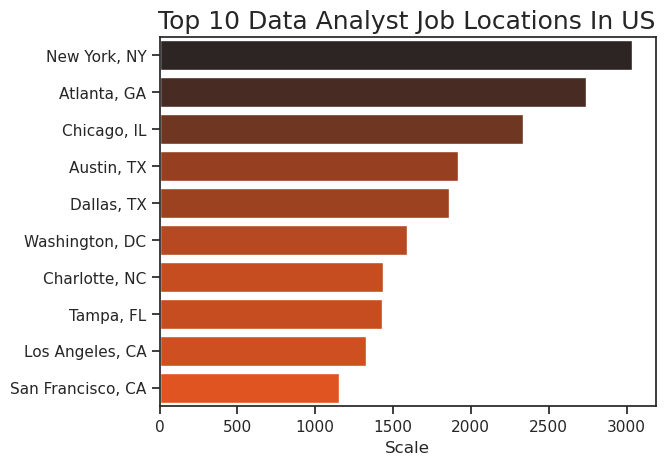

In [32]:
df2 = df.copy()

df2 = df2[(df2["job_country"] == "United States") & (df2["job_title_short"] == "Data Analyst")]
df2.dropna(subset = "job_location", inplace = True)

df2_plot = (df2.groupby(by = "job_location")
            .agg(job_offer = ("job_location", "size"))
            .drop(labels = "Anywhere")
            .sort_values(by = "job_offer", ascending = False)
            .head(10)
            )

sns.set_theme(style = "ticks")
sns.barplot(data = df2_plot
            , x = "job_offer"
            , y = df2_plot.index
            , hue = "job_offer"
            , palette = "dark:#FF4500_r"
            , legend = False
            )
plt.title("Top 10 Data Analyst Job Locations In US", fontsize = 18, loc = "right")
plt.ylabel("")
plt.xlabel("Scale")
plt.show()

In [33]:
# 3. Find out the nature of the job.

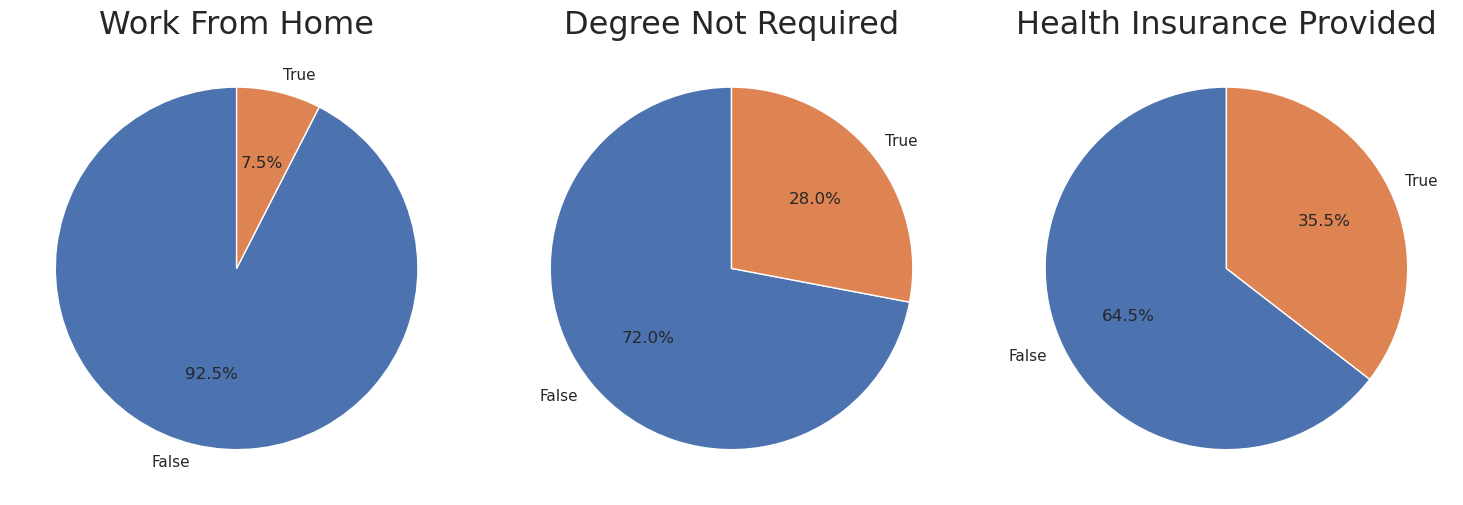

In [53]:
dic = {'job_work_from_home' : 'Work From Home', 'job_no_degree_mention' : 'Degree Not Required', 'job_health_insurance' : 'Health Insurance Provided'}

fig, ax = plt.subplots(1,3, figsize = (15,5))

for i, (series,title) in enumerate(dic.items()) :
    df3 = df.copy()
    df3 = df3[(df3["job_country"] == "United States") & (df3["job_title_short"] == "Data Analyst")]
    df3 = df3.dropna(subset = series)
    df3_plot = (df3.groupby(by = series)
                .agg(status = (series, "size"))
                )
    
    sns.set_theme(style = "ticks")
    df3_plot.plot(kind = "pie"
                  , y = "status"
                  , ax = ax[i]
                  , startangle = 90
                  , autopct = "%1.1f%%")
    ax[i].legend().remove()
    ax[i].set_ylabel("")
    ax[i].set_title(title, fontsize = 23)

fig.tight_layout()
